In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

ModuleNotFoundError: No module named 'otter'

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

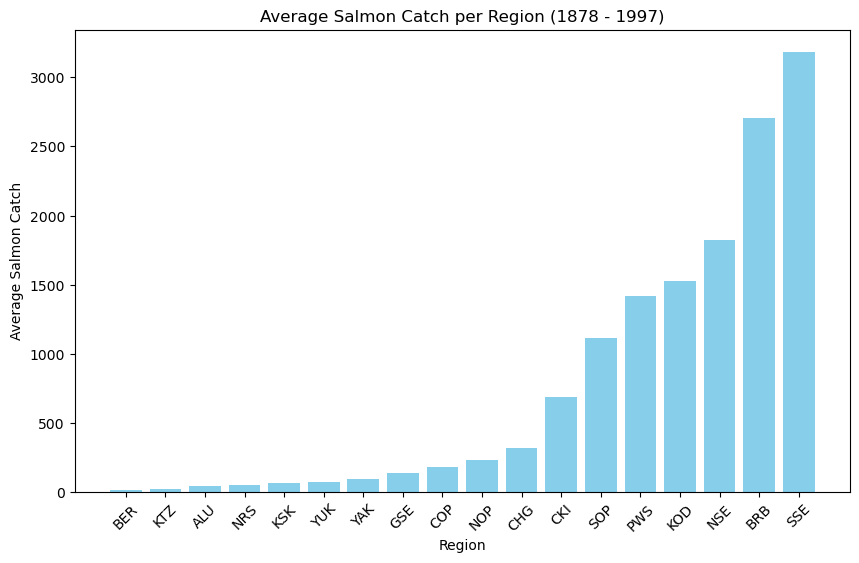

In [10]:
# FINAL CODE

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Use read_csv and assign to varible 
catch_data = pd.read_csv("data/salmon_data.csv")

# Check the dimensions of the data
catch_data.shape

# Check the head of the data
catch_data.head

# Check for null values 
catch_data.isnull().sum()

# Check the data types of each series
catch_data.dtypes

# Use .unique() to find all unique values and save them to a variable called notes_unique
notes_unique = catch_data.notesRegCode.unique()

# Use .drop to select notesRegCode column to drop, select axis = 1 to specify it is a column 
catch_data = catch_data.drop('notesRegCode', axis=1)

# Use dtypes to check the data type on each series
catch_data.dtypes

# Convert Catch column to integer
# catch_data['Catch'].astype(int)

# Error with trying to convert Catch series to integer. Index the Catch series to find the value I
catch_data.loc[catch_data['Catch'] == 'I']

# Update the value of 'I' to 1 in catch_data 
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Check the row to verify
catch_data.loc[400]

# Now update the Catch column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype(int)

# Confirm the type using dtypes
catch_data.Catch.dtype

# Use groupby to sort data frame by average salmon catch per region, reset index 
avg_region = catch_data.groupby(['Region'])['Catch'].mean().round(2).reset_index()
avg_region

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_region_sorted = avg_region.sort_values(by='Catch')
plt.bar(avg_region_sorted['Region'], avg_region_sorted['Catch'], color='skyblue')

# Add titles and labels
plt.title('Average Salmon Catch per Region (1878 - 1997)')
plt.xlabel('Region')
plt.ylabel('Average Salmon Catch')
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
catch_data = pd.read_csv("data/salmon_data.csv")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. 

# Check the dimensions of the data
print(catch_data.shape)

# Check the head of the data
print(catch_data.head)

# Check for null values 
print(catch_data.isnull().sum())

# Check the data types of each series
print(catch_data.dtypes)

# Check for unique values in year columns 
print(catch_data.Year.unique())



(8540, 5)
<bound method NDFrame.head of      Region  Year notesRegCode  Species Catch
0       SSE  1886          NaN  Chinook     0
1       SSE  1887          NaN  Chinook     0
2       SSE  1888          NaN  Chinook     0
3       SSE  1889          NaN  Chinook     0
4       SSE  1890          NaN  Chinook     0
...     ...   ...          ...      ...   ...
8535    NOP  1993          NaN     Chum   135
8536    NOP  1994          NaN     Chum    84
8537    NOP  1995          NaN     Chum    99
8538    NOP  1996          NaN     Chum    68
8539    NOP  1997          NaN     Chum    97

[8540 rows x 5 columns]>
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64
Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
[1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 191

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

As a side note, I cannot comment or delete the code chunk that was meant for this question. 

I chose to do shape and head to see some basic information about my data set. I learned that the data frame has 8,540 rows and 5 columns. This can be handy to know when you are subsetting your data or joining other data sets. I also chose head to see a few rows and what data was inputted. 

I used isnull and sum to see if I had any null values, which could effect any arithmetic operations. 

I used dtypes to see what data type was in each column. This way I know what operations are possible on each series.

Lastly, I used unique on the Year columns specifically because I was currious if it inlcuded every single year between 1878 and 1997 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Use .unique() to find all unique values and save them to a variable called notes_unique
notes_unique = catch_data.notesRegCode.unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# Use .drop to select the column you want to drop. select axis = 1 for column 
catch_data = catch_data.drop('notesRegCode', axis=1)

# Print column names to check 
print(catch_data.columns)

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


The year is stored as an int64 and is not a datetime. Catch is a an object and should be stored as an int64 since it is a number

In [7]:
# Use dtypes to check the data type on each series
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
catch_data['Catch'].astype(int)

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [9]:
# Index the Catch series to find the value I 
catch_I = catch_data.loc[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [10]:
# 1. Update the value of 'I' to 1 in your original DataFrame 'catch_data'
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# 2. Access the updated row and store it in the `catch_1` variable
catch_1 = catch_data.loc[400]

print(catch_1)



Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [11]:
# Update the Catch column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype(int)
# Confirm the type using dtypes
catch_data.Catch.dtype

# Store the type in catch_column_variable
catch_column_type = catch_data['Catch'].dtype
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [7]:
# Use groupby to sort data frame by average salmon catch per region, reset index 
avg_region = catch_data.groupby(['Region'])['Catch'].mean().round(2).reset_index()
avg_region

,Region,Catch
0,ALU,40.38
1,BER,16.37
2,BRB,2709.80
3,CHG,315.49
4,CKI,683.57
5,COP,179.22
6,GSE,133.84
7,KOD,1528.35
8,KSK,67.64
9,KTZ,18.84


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

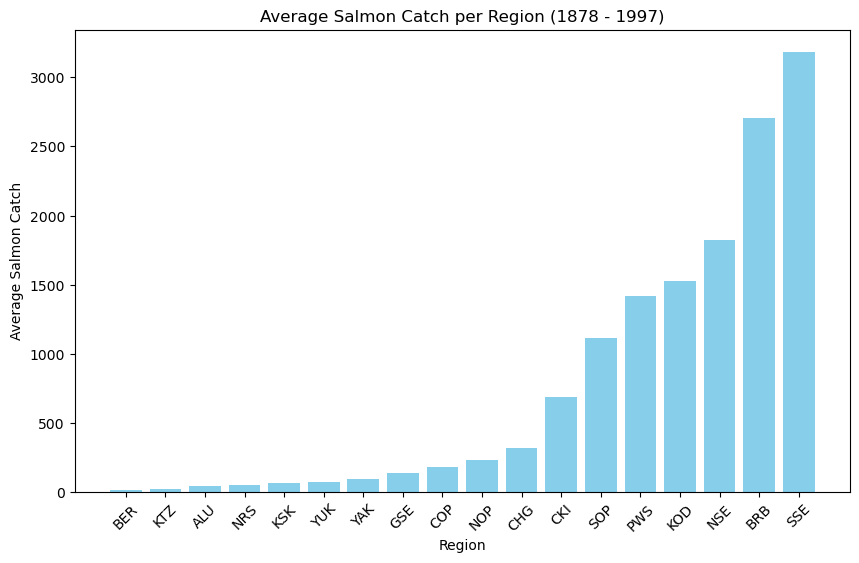

In [8]:
# Create a bar plot
plt.figure(figsize=(10, 6))
avg_region_sorted = avg_region.sort_values(by='Catch')
plt.bar(avg_region_sorted['Region'], avg_region_sorted['Catch'], color='skyblue')

# Add titles and labels
plt.title('Average Salmon Catch per Region (1878 - 1997)')
plt.xlabel('Region')
plt.ylabel('Average Salmon Catch')
plt.xticks(rotation=45)

# Show the plot
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The graph shows the average salmon catches by region between the years 1878 and 1997. Southern Southeast Alaska had the highest average with roughly 3200 salmon caught. Bering River Subarea had the lowest average, around 16 salmon caught. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).